In [61]:
import os
import shutil
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Flatten
from keras.models import Model, load_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import load_img, img_to_array 
from IPython.display import Image, display

warnings.filterwarnings("ignore")

In [22]:
# Building Model

base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)

In [23]:
for layer in base_model.layers:
    layer.trainable = False

In [24]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation="sigmoid")(X)

In [25]:
model = Model(base_model.input, X)
model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [26]:
# preprocessing image using Data Generator

train_datagen = ImageDataGenerator(featurewise_center=True, rotation_range=0.4, width_shift_range=0.3, 
                                   horizontal_flip=True, preprocessing_function=preprocess_input, zoom_range=0.4, 
                                   shear_range=0.4)
train_data = train_datagen.flow_from_directory(directory="./train", target_size=(256, 256), batch_size=64)


Found 19979 images belonging to 2 classes.


In [27]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


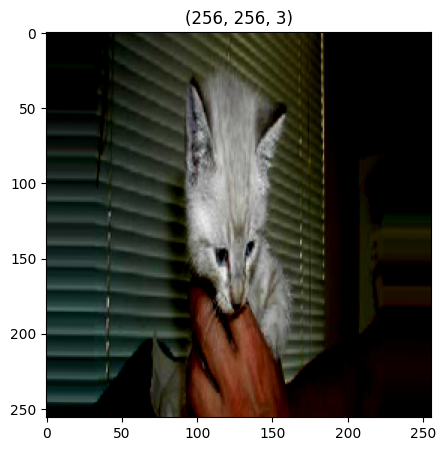

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


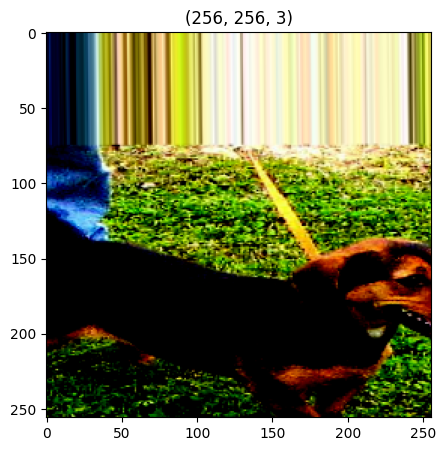

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


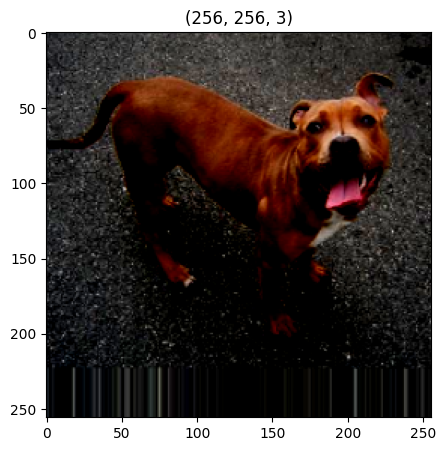

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


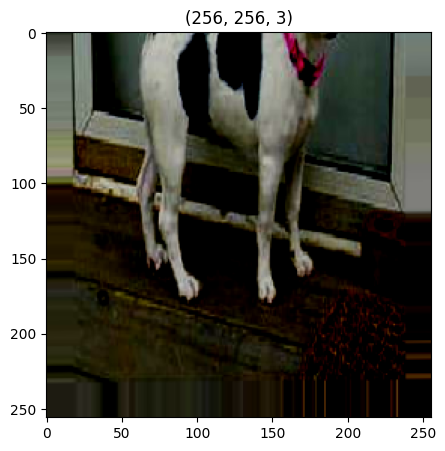

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


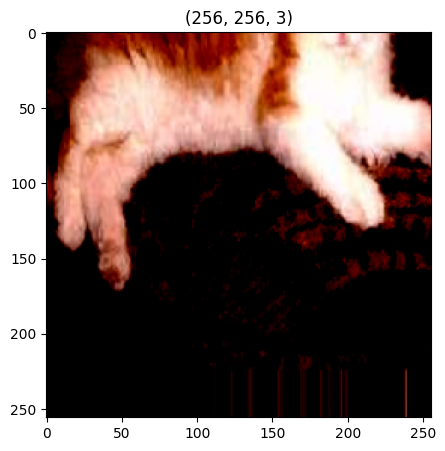

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


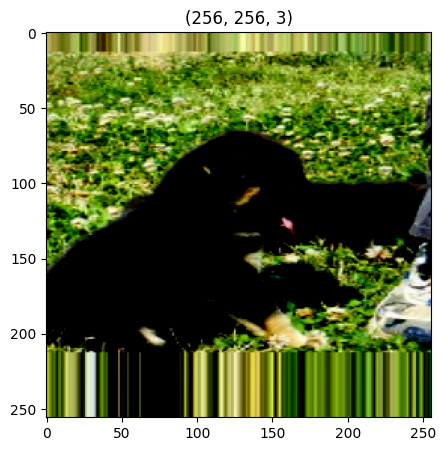

In [28]:
# visualizing the data

t_img, label = train_data.next()


def plotImages(img_arr, label):
    for idx, img in enumerate(img_arr):
        if idx <= 5:
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.show()


plotImages(t_img, label)

In [29]:
# EarlyStopping

es = EarlyStopping(monitor="accuracy", min_delta=0.01, patience=5, verbose=1)

# ModelCheckpoint

mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="accuracy", verbose=1, save_best_only=True)

cb = [mc, es]

In [30]:
# Train model

history = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.3670 - accuracy: 0.8484
Epoch 1: accuracy improved from -inf to 0.84844, saving model to bestmodel.h5
10/10 [==============================] - 23s 2s/step - loss: 1.3670 - accuracy: 0.8484
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2956 - accuracy: 0.9656
Epoch 2: accuracy improved from 0.84844 to 0.96562, saving model to bestmodel.h5
10/10 [==============================] - 19s 2s/step - loss: 0.2956 - accuracy: 0.9656
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1357 - accuracy: 0.9812
Epoch 3: accuracy improved from 0.96562 to 0.98125, saving model to bestmodel.h5
10/10 [==============================] - 19s 2s/step - loss: 0.1357 - accuracy: 0.9812
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1515 - accuracy: 0.9781
Epoch 4: accuracy did not improve from 0.98125
10/10 [==============================] - 20s 2s/step - loss: 0.1515 - accura

In [32]:
# loading model

model = load_model("./bestmodel.h5")

In [33]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy'])

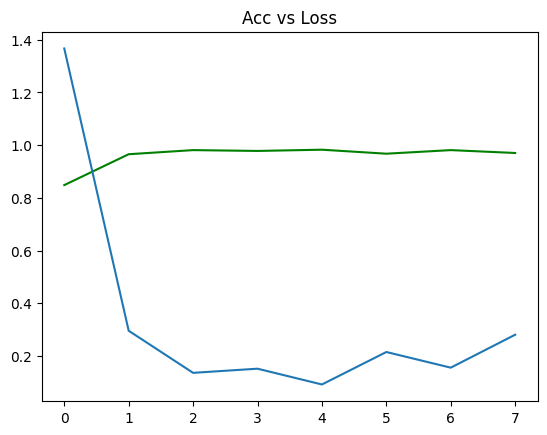

In [36]:
plt.plot(h["accuracy"], c="green")
plt.plot(h["loss"])
plt.title("Acc vs Loss")
plt.show()

1/1 [==============================] - 0s 59ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


This is a Dog image


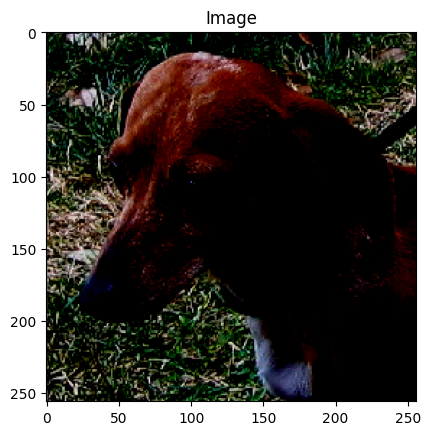

In [41]:
# Validate out model

path = "test/Dog/10011.jpg"
img = load_img(path, target_size=(256, 256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("This is a Cat image")
else:
    print("This is a Dog image")

plt.imshow(input_arr[0])
plt.title("Image")
plt.show()